In [1]:
import json
from utils.gho_filter import filter_gho_users

with open('results.json', 'r') as fp:
    res = json.load(fp)
data = []
for entry in res:
    data += entry['data']['users']

gho_users = filter_gho_users(data)
print(len(gho_users))

2297


In [8]:
gho_users = set(gho_users)
gho_user_txs = [entry for entry in data if entry['id'] in (gho_users)]

In [51]:
from datetime import datetime

def date_to_timestamp(date_string):
    return int(datetime.strptime(date_string, "%Y-%m-%d").timestamp())

start_date = "2023-07-17"
end_date = "2023-08-31"

start_timestamp = date_to_timestamp(start_date)
end_timestamp = date_to_timestamp(end_date)

gho_borrows_23 = {}
for user in gho_user_txs:
    user_txs = [tx for tx in user['borrowHistory'] if ((tx['reserve']['symbol'] == 'GHO') and start_timestamp <= tx['timestamp'] < end_timestamp)]
    if user_txs:
        gho_borrows_23[user['id']] = sum([(float(deets['amount']) // 1e18) for deets in user_txs])

In [89]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

amounts = pd.Series(gho_borrows_23.values())
amounts.describe()

count       625.00
mean      65674.56
std      228871.54
min           0.00
25%        1370.00
50%       10000.00
75%       40000.00
max     3999999.00
dtype: float64

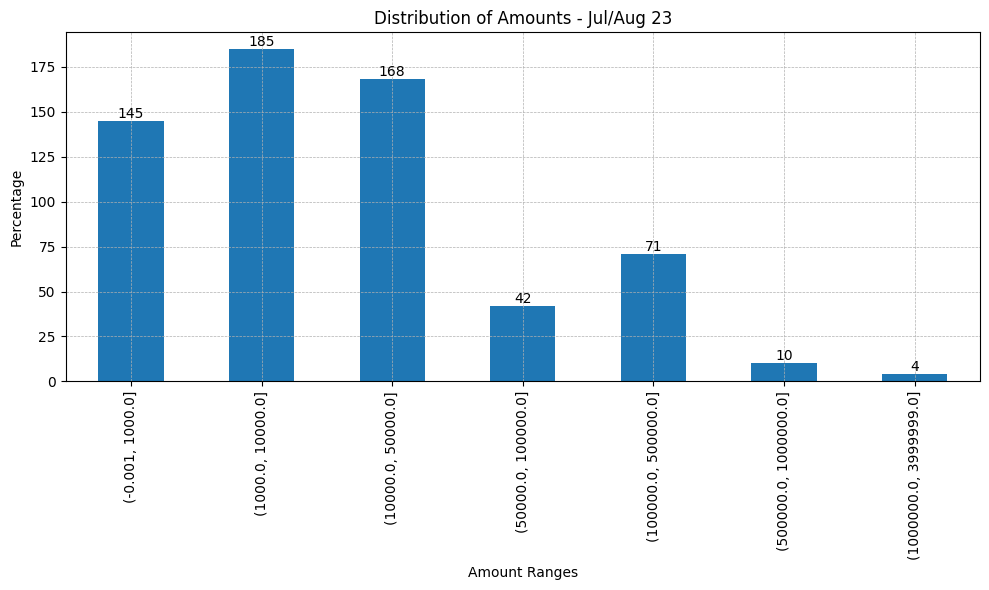

In [90]:
import matplotlib.pyplot as plt
import pandas as pd

bins = [0, 1000, 10000, 50000, 100000, 500000, 1000000, amounts.max()]

amounts_binned = pd.cut(amounts, bins, right=True, include_lowest=True)

# Calculate percentages
counts = amounts_binned.value_counts().sort_index()
percentages = (counts / len(amounts)) * 100

plt.figure(figsize=(10, 6))
counts.plot(kind='bar')
plt.title('Distribution of Amounts - Jul/Aug 23')
plt.xlabel('Amount Ranges')
plt.ylabel('Percentage')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add percentage labels on top of each bar
for i, v in enumerate(counts):
    plt.text(i, v, f'{v:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [91]:
start_date = "2024-07-17"
end_date = "2024-08-31"

start_timestamp = date_to_timestamp(start_date)
end_timestamp = date_to_timestamp(end_date)

gho_borrows_24 = {}
for user in gho_user_txs:
    user_txs = [tx for tx in user['borrowHistory'] if ((tx['reserve']['symbol'] == 'GHO') and start_timestamp <= tx['timestamp'] < end_timestamp)]
    if user_txs:
        gho_borrows_24[user['id']] = sum([(float(deets['amount']) // 1e18) for deets in user_txs])

In [92]:
amounts = pd.Series(gho_borrows_24.values())
amounts.describe()

count       504.00
mean      98017.93
std      367535.85
min           0.00
25%        1249.50
50%       10000.00
75%       49402.00
max     5325245.00
dtype: float64

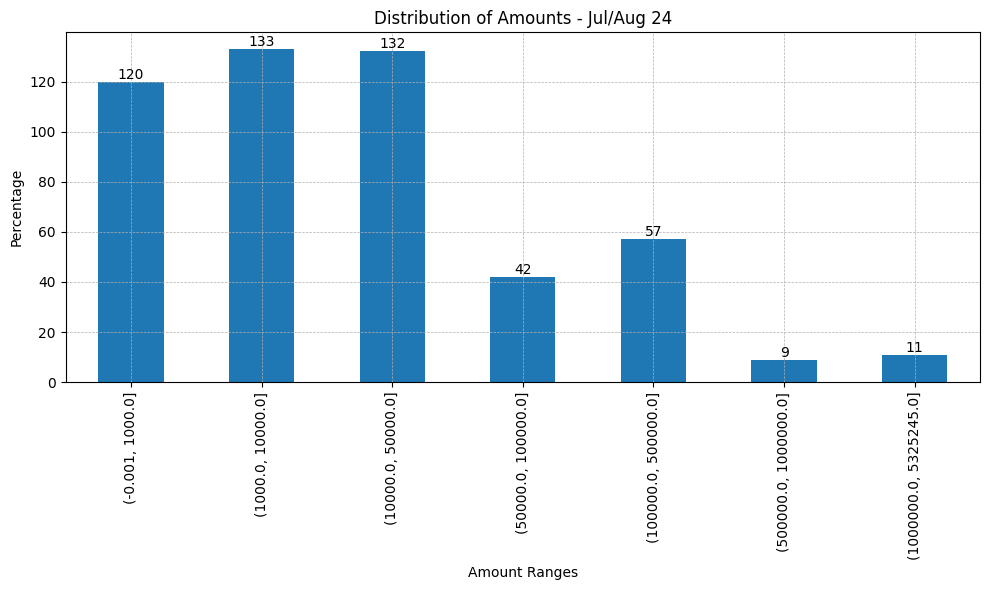

In [93]:
import matplotlib.pyplot as plt
import pandas as pd

bins = [0, 1000, 10000, 50000, 100000, 500000, 1000000, amounts.max()]

amounts_binned = pd.cut(amounts, bins, right=True, include_lowest=True)

counts = amounts_binned.value_counts().sort_index()
percentages = (counts / len(amounts)) * 100

plt.figure(figsize=(10, 6))
counts.plot(kind='bar')
plt.title('Distribution of Amounts - Jul/Aug 24')
plt.xlabel('Amount Ranges')
plt.ylabel('Percentage')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

for i, v in enumerate(counts):
    plt.text(i, v, f'{v:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [94]:
start_date = "2024-07-17"
end_date = "2024-08-31"

start_timestamp = date_to_timestamp(start_date)
end_timestamp = date_to_timestamp(end_date)

gho_new_borrows_24 = {}
for user in gho_user_txs:
    if len([tx for tx in user['borrowHistory'] if ((tx['reserve']['symbol'] == 'GHO') and tx['timestamp'] <  start_timestamp)]) > 0:
        continue
    user_txs = [tx for tx in user['borrowHistory'] if ((tx['reserve']['symbol'] == 'GHO') and start_timestamp <= tx['timestamp'] < end_timestamp)]
    if user_txs:
        gho_new_borrows_24[user['id']] = sum([(float(deets['amount']) // 1e18) for deets in user_txs])

In [95]:
amounts = pd.Series(gho_new_borrows_24.values())
amounts.describe()

count       283.00
mean      70799.55
std      191410.84
min           0.00
25%         500.00
50%        6530.00
75%       40000.00
max     1299999.00
dtype: float64

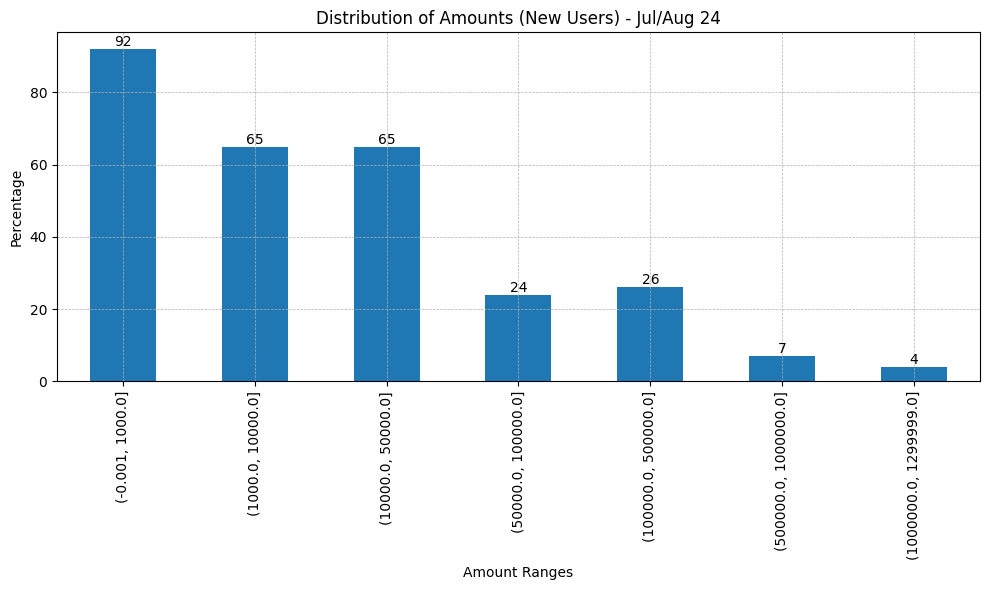

In [96]:
import matplotlib.pyplot as plt
import pandas as pd

bins = [0, 1000, 10000, 50000, 100000, 500000, 1000000, amounts.max()]

amounts_binned = pd.cut(amounts, bins, right=True, include_lowest=True)


counts = amounts_binned.value_counts().sort_index()
percentages = (counts / len(amounts)) * 100

plt.figure(figsize=(10, 6))
counts.plot(kind='bar')
plt.title('Distribution of Amounts (New Users) - Jul/Aug 24')
plt.xlabel('Amount Ranges')
plt.ylabel('Percentage')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)


for i, v in enumerate(counts):
    plt.text(i, v, f'{v:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [107]:
start_date = "2024-05-01"
end_date = "2024-07-01"

start_timestamp = date_to_timestamp(start_date)
end_timestamp = date_to_timestamp(end_date)

gho_spring_borrows_24 = {}
for user in gho_user_txs:
    user_txs = [tx for tx in user['borrowHistory'] if ((tx['reserve']['symbol'] == 'GHO') and start_timestamp <= tx['timestamp'] < end_timestamp)]
    if user_txs:
        gho_spring_borrows_24[user['id']] = sum([(float(deets['amount']) // 1e18) for deets in user_txs])

In [118]:

for user in gho_user_txs:
    a = [tx for tx in user['borrowHistory'] if ((tx['reserve']['symbol'] == 'GHO') and (start_timestamp <= tx['timestamp'] < end_timestamp)) and ((float(tx['amount']) * 1e-18) > 1e6)]
    if a:
        print(a)
        print(float(a[0]['amount']) * 1e-18)

[{'action': 'Borrow', 'amount': '2000000000000000000000000', 'assetPriceUSD': '0', 'borrowRate': '120000000000000000000000000', 'borrowRateMode': 2, 'caller': {'id': '0xdd38127788f0247ca387717f9e5ba3ce66685b7a'}, 'referrer': None, 'reserve': {'debtCeiling': None, 'decimals': 18, 'name': 'Gho Token', 'symbol': 'GHO'}, 'stableTokenDebt': '0', 'timestamp': 1717786859, 'txHash': '0x3152d1cd748aca0aee38a05c30b723f948cdfab00b86ccab9d9ad1a7b56bcaaf', 'variableTokenDebt': '1896644651480879161952114'}]
2000000.0
[{'action': 'Borrow', 'amount': '3370528768937010800000000', 'assetPriceUSD': '0', 'borrowRate': '120000000000000000000000000', 'borrowRateMode': 2, 'caller': {'id': '0xfcc5acd50ae590889d2a53343d35b5fb80d403c2'}, 'referrer': None, 'reserve': {'debtCeiling': None, 'decimals': 18, 'name': 'Gho Token', 'symbol': 'GHO'}, 'stableTokenDebt': '0', 'timestamp': 1717273211, 'txHash': '0x94fab2015a8c3be5fc7c5dfe8cd31a966fb758f2c7772b9fbad5e0391fe8c3ec', 'variableTokenDebt': '320260111758681978468

In [119]:
import json
with open('transfer_results.json', 'r') as fp:
    tx_data = json.load(fp)

In [121]:
hashes = ['0x94fab2015a8c3be5fc7c5dfe8cd31a966fb758f2c7772b9fbad5e0391fe8c3ec', '0xac837669efd297ab76c156542bf784d84b4752be5de97a3968ce0b5795cde62f', '0x5c4c97482ff7e5c19758fd4cebe6ce3a4156315b820820cdd4c8619ca2e65ef7']

In [122]:
([tx for tx in tx_data if tx['transactionHash'] in hashes])

[{'from': '0x0000000000000000000000000000000000000000',
  'to': '0xfcc5acd50ae590889d2a53343d35b5fb80d403c2',
  'value': '3370528768937010800000000',
  'transferIndex': 50867,
  'borrowCap': '68000000',
  'supplyCap': '0',
  'totalVariableDebt': '67965963103548234140661926',
  'variableBorrowRate': '120000000000000000000000000',
  'blockNumber': '19999319',
  'blockTimestamp': '1717273211',
  'transactionHash': '0x94fab2015a8c3be5fc7c5dfe8cd31a966fb758f2c7772b9fbad5e0391fe8c3ec'},
 {'from': '0x0000000000000000000000000000000000000000',
  'to': '0xfcc5acd50ae590889d2a53343d35b5fb80d403c2',
  'value': '6910798765767999900000000',
  'transferIndex': 51072,
  'borrowCap': '75000000',
  'supplyCap': '0',
  'totalVariableDebt': '74930211709506886397410455',
  'variableBorrowRate': '120000000000000000000000000',
  'blockNumber': '20012648',
  'blockTimestamp': '1717434035',
  'transactionHash': '0xac837669efd297ab76c156542bf784d84b4752be5de97a3968ce0b5795cde62f'},
 {'from': '0x000000000000000

In [108]:
amounts = pd.Series(gho_spring_borrows_24.values())
amounts.describe()

count        444.00
mean      115739.56
std       813807.05
min            0.00
25%         1000.00
50%         9369.00
75%        35625.00
max     15381325.00
dtype: float64

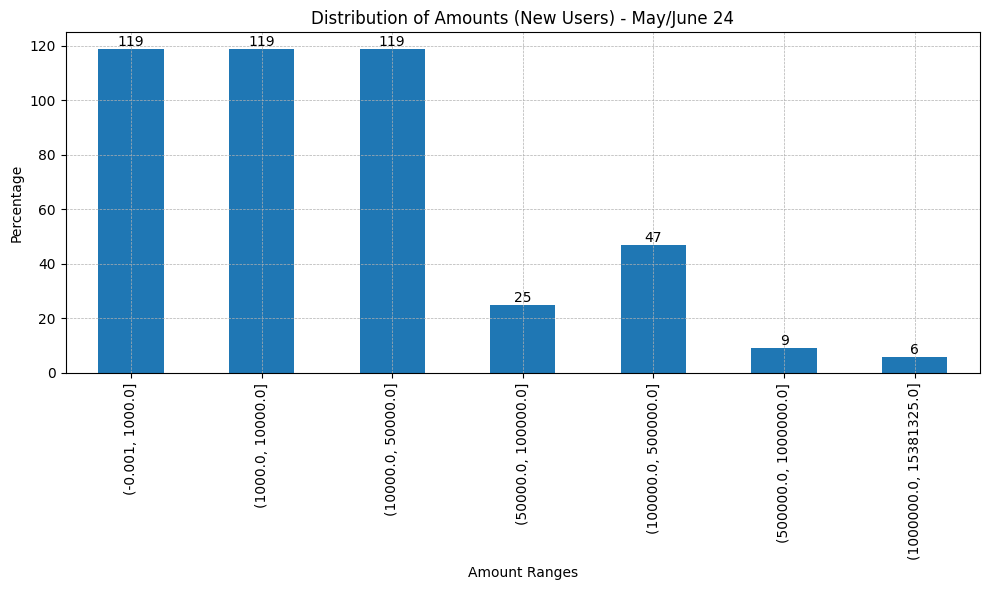

In [109]:
import matplotlib.pyplot as plt
import pandas as pd

bins = [0, 1000, 10000, 50000, 100000, 500000, 1000000, amounts.max()]

amounts_binned = pd.cut(amounts, bins, right=True, include_lowest=True)


counts = amounts_binned.value_counts().sort_index()
percentages = (counts / len(amounts)) * 100

plt.figure(figsize=(10, 6))
counts.plot(kind='bar')
plt.title('Distribution of Amounts (New Users) - May/June 24')
plt.xlabel('Amount Ranges')
plt.ylabel('Percentage')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)


for i, v in enumerate(counts):
    plt.text(i, v, f'{v:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [33]:
from datetime import datetime, timedelta

gho_borrows_month = {}
start_date = datetime(2023, 7, 1)
end_date = datetime(2024, 9, 1)

for i in range(14):  # 14 months from July 2023 to August 2024
    current_month = {}
    month_start = start_date + timedelta(days=30*i)
    month_end = month_start + timedelta(days=30)
    
    start_timestamp = int(month_start.timestamp())
    end_timestamp = int(month_end.timestamp())
    
    for user in gho_user_txs:
        user_txs = [tx for tx in user['borrowHistory'] if ((tx['reserve']['symbol'] == 'GHO') and 
                    start_timestamp <= tx['timestamp'] < end_timestamp)]
        if user_txs:
            current_month[user['id']] = sum([(float(deets['amount']) // 1e18) for deets in user_txs])
    
    gho_borrows_month[i] = list(current_month.values())

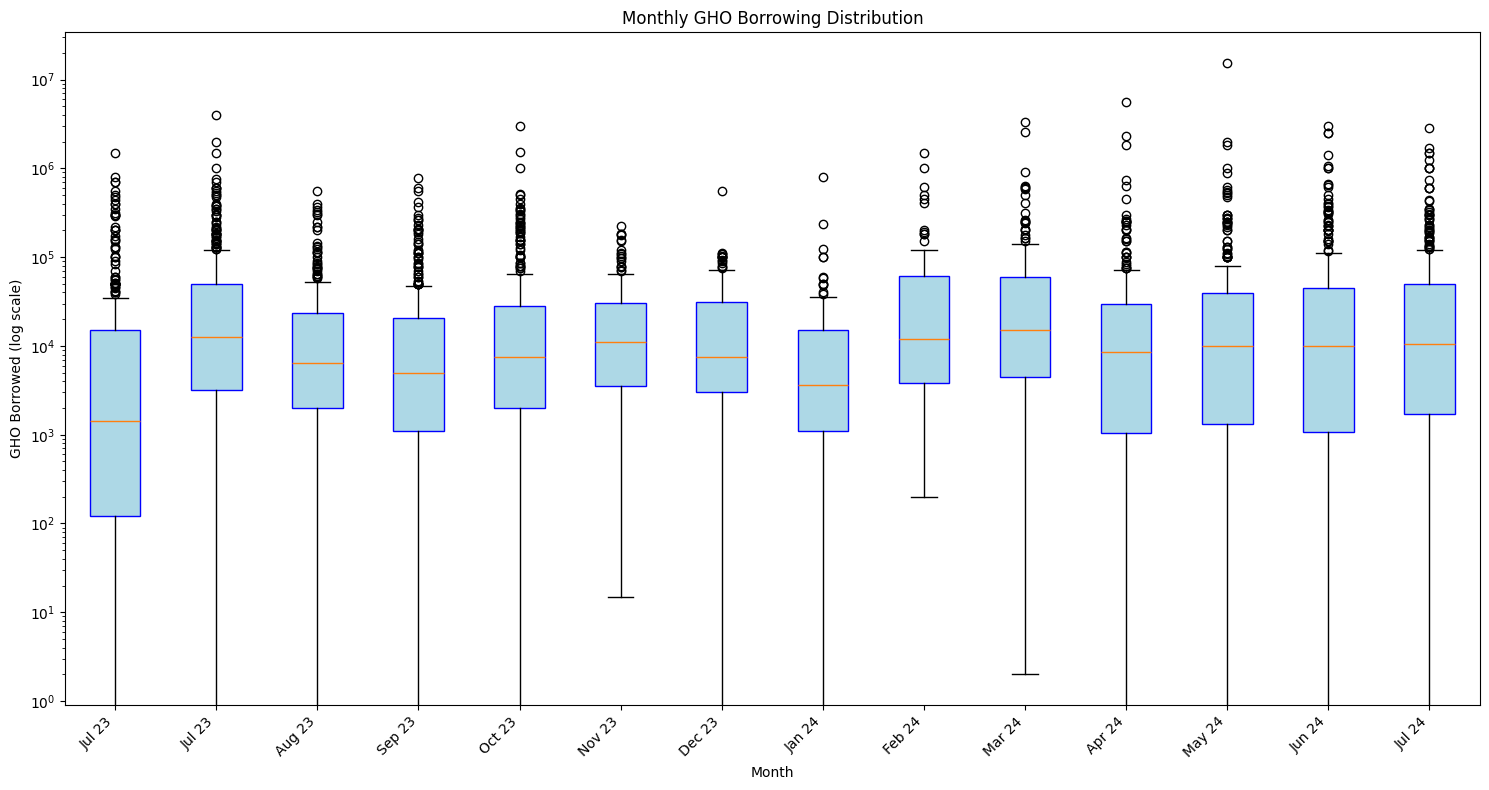

In [36]:
import matplotlib.pyplot as plt
import calendar
from datetime import datetime, timedelta

start_date = datetime(2023, 7, 1)
month_labels = []
for i in range(14):
    current_date = start_date + timedelta(days=30*i)
    month_labels.append(f"{calendar.month_abbr[current_date.month]} {str(current_date.year)[2:]}")

plt.figure(figsize=(15, 8))

bp = plt.boxplot(gho_borrows_month.values(), patch_artist=True)

for box in bp['boxes']:
    box.set(facecolor='lightblue', edgecolor='blue')

plt.xticks(range(1, len(month_labels) + 1), month_labels, rotation=45, ha='right')

plt.yscale('log')

plt.xlabel('Month')
plt.ylabel('GHO Borrowed (log scale)')
plt.title('Monthly GHO Borrowing Distribution')

plt.tight_layout()
plt.show()

In [41]:
import numpy as np
means = [np.mean(gho_borrows_month[i]) for i in gho_borrows_month.keys()]
medians = [np.median(gho_borrows_month[i]) for i in gho_borrows_month.keys()]

<Axes: >

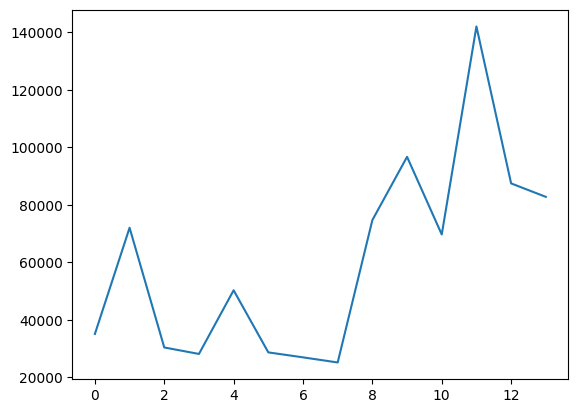

In [40]:
pd.Series(means).plot()

<Axes: >

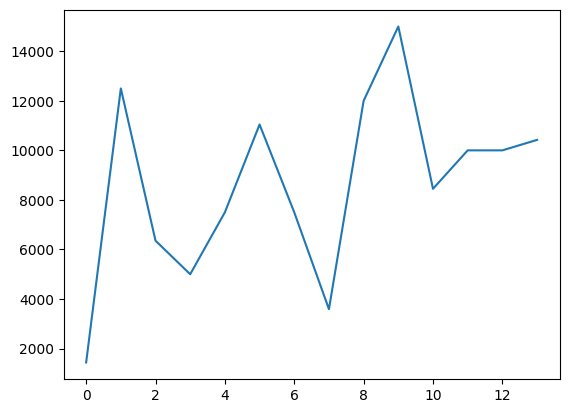

In [43]:
pd.Series(medians).plot()